In [81]:
import sys
from pathlib import Path

sys.path.append(r"/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
from io import StringIO
import matplotlib.lines as mlines
from sklearn.preprocessing import StandardScaler

from data_analysis.data_fetcher.data_fetcher_class import DataFetcher
from data_collection.consts import  DB_PARAMS

In [82]:
fetcher = DataFetcher(
    db_params=DB_PARAMS,
    reports_table="reports_2",
    targets_table="targets_yf",
)

Available regressors:
 - avg_default_verbolizer
 - avg_shrink_verbolizer
 - doc_len
 - eps_surprise
 - f_size
 - full_list_default_verbolizer
 - full_list_shrink_verbolizer
 - hv_orig_score
 - lm_orig_score
 - max_abs_default
 - max_abs_shrink
 - max_default_verbolizer
 - max_shrink_verbolizer
 - md_hv1
 - md_hv2
 - md_hv3
 - md_lm1
 - md_lm2
 - md_lm3
 - min_default_verbolizer
 - min_shrink_verbolizer
 - stretch_default
 - stretch_shrink
Available sectors:
 - Technology (92)
 - Industrials (86)
 - Financial Services (85)
 - Healthcare (66)
 - Consumer Cyclical (58)
 - Consumer Defensive (40)
 - Real Estate (32)
 - Utilities (32)
 - Energy (30)
 - Basic Materials (23)
 - Communication Services (22)


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:111: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [83]:
df = fetcher.fetch_data(
    regressors=[
    'hv_orig_score', 
    "md_hv1", 
    "md_hv2", 
    'md_hv3', 
    'lm_orig_score', 
    'md_lm1', 
    'md_lm2', 
    'md_lm3',
    'eps_surprise',
    'f_size',
    'doc_len'
    
    ],
    prepare_fixed_effects=True,
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:130: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:161: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:169: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBA

In [84]:
df.isna().sum()

report_type          0
hv_orig_score        0
md_hv1               0
md_hv2               0
md_hv3               0
lm_orig_score        0
md_lm1               0
md_lm2               0
md_lm3               0
eps_surprise         0
f_size               0
doc_len              0
two_day_r            0
three_day_r          0
four_day_r           0
five_day_r           0
six_day_r            0
seven_day_r          0
full_q_r             0
two_day_e_r          0
three_day_e_r        0
four_day_e_r         0
five_day_e_r         0
six_day_e_r          0
seven_day_e_r        0
full_q_e_r           0
two_day_abn_r        0
three_day_abn_r      0
four_day_abn_r       0
five_day_abn_r       0
six_day_abn_r        0
seven_day_abn_r      0
full_q_abn_r         0
two_day_r_vol      159
three_day_r_vol    159
four_day_r_vol     159
five_day_r_vol     159
six_day_r_vol      159
seven_day_r_vol    159
full_q_r_vol       159
dtype: int64

In [85]:
df['f_size']

company  date  
A        2019.1    2.500438e+10
         2019.2    2.125425e+10
         2019.3    2.146794e+10
         2019.4    2.632371e+10
         2020.1    2.611906e+10
                       ...     
ZTS      2022.2    7.943747e+10
         2022.3    8.174137e+10
         2022.4    6.229984e+10
         2023.1    8.110199e+10
         2023.2    8.605912e+10
Name: f_size, Length: 8089, dtype: float64

In [86]:
df.columns

Index(['report_type', 'hv_orig_score', 'md_hv1', 'md_hv2', 'md_hv3',
       'lm_orig_score', 'md_lm1', 'md_lm2', 'md_lm3', 'eps_surprise', 'f_size',
       'doc_len', 'two_day_r', 'three_day_r', 'four_day_r', 'five_day_r',
       'six_day_r', 'seven_day_r', 'full_q_r', 'two_day_e_r', 'three_day_e_r',
       'four_day_e_r', 'five_day_e_r', 'six_day_e_r', 'seven_day_e_r',
       'full_q_e_r', 'two_day_abn_r', 'three_day_abn_r', 'four_day_abn_r',
       'five_day_abn_r', 'six_day_abn_r', 'seven_day_abn_r', 'full_q_abn_r',
       'two_day_r_vol', 'three_day_r_vol', 'four_day_r_vol', 'five_day_r_vol',
       'six_day_r_vol', 'seven_day_r_vol', 'full_q_r_vol'],
      dtype='object')

In [87]:
df.loc[('A')]['f_size']


date
2019.1    2.500438e+10
2019.2    2.125425e+10
2019.3    2.146794e+10
2019.4    2.632371e+10
2020.1    2.611906e+10
2020.2    2.794432e+10
2020.3    3.188542e+10
2020.4    3.650901e+10
2021.1    3.636070e+10
2021.2    4.144117e+10
2021.3    5.389075e+10
2021.4    4.542699e+10
2022.1    4.018213e+10
2022.2    3.676797e+10
2022.3    3.789096e+10
2022.4    4.411769e+10
2023.1    4.217894e+10
2023.2    3.477462e+10
2023.3    3.566928e+10
2023.4    4.058875e+10
Name: f_size, dtype: float64

In [88]:
class FEModeler:
    """
    A class to run panel fixed effects regressions using PanelOLS
    and extract key parameter statistics for a specified regressor.

    Attributes:
        df: The input panel data.
        var_names: Column names of the input DataFrame.
        params_dict: Dictionary storing regression parameters for each independent variable.
    """

    def __init__(self, df: pd.DataFrame, scale: bool = False):
        """
        Initialize the FEModeler with panel data.

        Args:
            df: Panel DataFrame with MultiIndex (entity, time).
            scale: Whether to standardize the regressors.
        """
        self.original_df = df.copy()
        self.df = df.copy()
        self.var_names = df.columns
        self.params_dict = {}
        self.scale = scale

        if scale:
            self._scale_regressors()

    def _scale_regressors(self):
        """
        Standardize regressors: columns 1 to 8 (your x variables), plus control variables eps_surprise, f_size.
        Scaling is done entity-wise (within-entity).
        """
        x_cols = list(self.df.columns[1:9]) + ['eps_surprise', 'f_size']
        scaler = StandardScaler()

        # Scale within each entity group
        for entity in self.df.index.get_level_values(0).unique():
            entity_mask = self.df.index.get_level_values(0) == entity
            sub_df = self.df.loc[entity_mask, x_cols]
            if sub_df.shape[0] < 2:
                continue
            self.df.loc[entity_mask, x_cols] = scaler.fit_transform(sub_df)


    @staticmethod
    def extract_params(summary, regressor_name: str) -> pd.Series:
        """
        Extract parameter statistics for a given regressor from the regression summary.

        Args:
            summary: The PanelOLS regression summary object.
            regressor_name: The name of the regressor to extract parameters for.

        Returns:
            A Series containing coefficient, std error, p-value, and confidence intervals.
        """
        coef_table = summary.tables[1].as_html()
        coef_table_io = StringIO(coef_table)
        df = pd.read_html(coef_table_io, header=0, index_col=0)[0]
        df.columns = ['Parameter', 'std_err', 'T-stat', 'P-value', 'Lower CI', 'Upper CI']
        return df.loc[regressor_name, ['Parameter', 'std_err', 'P-value', 'Lower CI', 'Upper CI']].copy()

    def fit(self, data: pd.DataFrame, formula: str):
        """
        Fit a fixed effects regression model using PanelOLS.

        Args:
            data: A subset of the full DataFrame containing required variables.
            formula: Regression formula in Patsy-style syntax.

        Returns:
            The regression summary object.
        """
        model = PanelOLS.from_formula(formula, data=data, check_rank=True)
        result = model.fit(cov_type='kernel')
        return result.summary

    def compute(self) -> dict[str, list[pd.Series]]:
        """
        Run fixed effects regressions for all combinations of independent and dependent variables,
        and store the parameter summaries for each independent variable.

        Returns:
            A dictionary where keys are independent variable names,
            and values are lists of Series with parameter info for each dependent variable.
        """
        targets = ['returns', 'e_returns', 'abn_returns', 'r_vol']
        time_frames = ['2_day', '3_day', '4_day', '5_day', '6_day', '7_day', 'full_quarter' ]

        var_names = self.df.columns 

        for x in range(1, 9):
            # Targets starts from y index
            y = 12

            per_target_params = {}
            for target in targets:  
                if target not in per_target_params:
                    per_target_params[target] = {}

                for frame in time_frames:
                    print(self.df.columns[x], self.df.columns[y])

                    data = self.df.iloc[:, [x, 9, 10, 11, y]].dropna().copy()
                    formula = f"{var_names[y]} ~ {var_names[x]}  + f_size + EntityEffects + TimeEffects"
                    try:
                        result_summary = self.fit(data, formula)
                        param_info = self.extract_params(result_summary, self.var_names[x])
                        per_target_params[target][self.df.columns[y]] = param_info
                        
                    except Exception as e:
                        print(e)
                    y += 1

            self.params_dict[self.df.columns[x]] = per_target_params

        return self.params_dict
    
    def plot_all_params(self):
        """
        Plot bar charts for each regressor–target combination.
        Each chart shows 7 timeframes with confidence intervals.
        """
        for regressor, target_dict in self.params_dict.items():
            for target, outcomes in target_dict.items():
                keys = list(outcomes.keys())
                if len(keys) < 1:
                    continue

                x = np.arange(len(keys))
                params = [outcomes[k]['Parameter'] for k in keys]
                lower = [outcomes[k]['Lower CI'] for k in keys]
                upper = [outcomes[k]['Upper CI'] for k in keys]

                plt.figure(figsize=(8, 6))
                plt.bar(x, params, width=0.4, color='tab:blue', label=regressor)

                # Confidence intervals
                for i in range(len(keys)):
                    plt.plot([x[i], x[i]], [lower[i], upper[i]], color='black', linewidth=1.5)

                plt.axhline(0, color='black', linewidth=1)
                plt.xticks(x, keys, rotation=45)
                plt.title(f"{regressor} on {target}")
                plt.xlabel('Time frame')
                plt.ylabel('Beta coefficient')
                plt.tight_layout()

                ci_legend = mlines.Line2D([], [], color='black', linewidth=1.5, label='95% CI')
                plt.legend(handles=[ci_legend])
                plt.show()


In [89]:
df.isna().sum()

report_type          0
hv_orig_score        0
md_hv1               0
md_hv2               0
md_hv3               0
lm_orig_score        0
md_lm1               0
md_lm2               0
md_lm3               0
eps_surprise         0
f_size               0
doc_len              0
two_day_r            0
three_day_r          0
four_day_r           0
five_day_r           0
six_day_r            0
seven_day_r          0
full_q_r             0
two_day_e_r          0
three_day_e_r        0
four_day_e_r         0
five_day_e_r         0
six_day_e_r          0
seven_day_e_r        0
full_q_e_r           0
two_day_abn_r        0
three_day_abn_r      0
four_day_abn_r       0
five_day_abn_r       0
six_day_abn_r        0
seven_day_abn_r      0
full_q_abn_r         0
two_day_r_vol      159
three_day_r_vol    159
four_day_r_vol     159
five_day_r_vol     159
six_day_r_vol      159
seven_day_r_vol    159
full_q_r_vol       159
dtype: int64

In [90]:
df

report_type  hv_orig_score    md_hv1    md_hv2    md_hv3  \
company date                                                              
A       2019.1        10-Q       0.295541  0.412048  0.463092  0.144105   
        2019.2        10-Q       0.295575  0.416058  0.453348  0.127967   
        2019.3        10-Q       0.312683  0.424395  0.457195  0.145952   
        2019.4        10-K       0.436916  0.425304  0.464432  0.146274   
        2020.1        10-Q       0.284157  0.415193  0.477226  0.121194   
...                    ...            ...       ...       ...       ...   
ZTS     2022.2        10-Q       0.466667  0.389347  0.418911  0.101604   
        2022.3        10-Q       0.456559  0.406380  0.436782  0.106592   
        2022.4        10-Q       0.470539  0.402945  0.427981  0.108857   
        2023.1        10-K       0.440743  0.385651  0.460024  0.138981   
        2023.2        10-Q       0.531283  0.408567  0.420854  0.092608   

                lm_orig_score    md_lm1    md_lm2    md_lm3  eps_surprise  \
company date                                                                
A       2019.1      -0.468391 -0.025729 -0.449024 -0.641541        0.0402   
        2019.2      -0.453815 -0.048077 -0.447552 -0.646677        0.1007   
        2019.3      -0.445783 -0.033708 -0.445215 -0.661836        0.0681   
        2019.4      -0.400521  0.051303 -0.409195 -0.652946        0.0119   
        2020.1      -0.505988 -0.049161 -0.442901 -0.656453        0.1379   
...                       ...       ...       ...       ...           ...   
ZTS     2022.2      -0.707921 -0.059844 -0.323251 -0.583618        0.2500   
        2022.3      -0.690205 -0.066086 -0.307759 -0.572581        0.1316   
        2022.4      -0.682203 -0.054340 -0.288221 -0.567780        0.1233   
        2023.1      -0.578481  0.032762 -0.370798 -0.592050        0.1159   
        2023.2      -0.550173 -0.035294 -0.330604 -0.562897        0.1081   

                ...  six_day_abn_r  seven_day_abn_r  full_q_abn_r  \
company date    ...                                                 
A       2019.1  ...      -0.083671         0.018716     -0.275623   
        2019.2  ...       0.039783         0.121091      0.013744   
        2019.3  ...       0.663081         0.830907      0.120227   
        2019.4  ...       0.136525         0.142246      0.002015   
        2020.1  ...      -0.946279        -0.692147      0.108150   
...             ...            ...              ...           ...   
ZTS     2022.2  ...      -0.000837         0.105352      0.016490   
        2022.3  ...      -0.679164        -0.741988     -0.280781   
        2022.4  ...      -0.626746        -0.627532      0.091092   
        2023.1  ...       0.933197         0.732441      0.131106   
        2023.2  ...       0.317253         0.265234     -0.019602   

                two_day_r_vol  three_day_r_vol  four_day_r_vol  \
company date                                                     
A       2019.1       0.131182         0.096568        0.088686   
        2019.2       0.060121         0.067283        0.076504   
        2019.3       0.079536         0.095590        0.096590   
        2019.4       0.063094         0.054265        0.050310   
        2020.1       0.258392         0.257832        0.236403   
...                       ...              ...             ...   
ZTS     2022.2       0.142569         0.142729        0.154875   
        2022.3       0.125953         0.116657        0.116078   
        2022.4       0.363517         0.335023        0.316788   
        2023.1       0.230088         0.175101        0.162249   
        2023.2       0.273621         0.246584        0.226731   

                five_day_r_vol  six_day_r_vol  seven_day_r_vol  full_q_r_vol  
company date                                                                  
A       2019.1        0.088205       0.084073         0.081526      0.120923  
        2019.2        0.080681       0.0804

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8089 entries, ('A', 2019.1) to ('ZTS', 2023.2)
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   report_type      8089 non-null   object 
 1   hv_orig_score    8089 non-null   float64
 2   md_hv1           8089 non-null   float64
 3   md_hv2           8089 non-null   float64
 4   md_hv3           8089 non-null   float64
 5   lm_orig_score    8089 non-null   float64
 6   md_lm1           8089 non-null   float64
 7   md_lm2           8089 non-null   float64
 8   md_lm3           8089 non-null   float64
 9   eps_surprise     8089 non-null   float64
 10  f_size           8089 non-null   float64
 11  doc_len          8089 non-null   int64  
 12  two_day_r        8089 non-null   float64
 13  three_day_r      8089 non-null   float64
 14  four_day_r       8089 non-null   float64
 15  five_day_r       8089 non-null   float64
 16  six_day_r        8089 non-null   floa

In [92]:
model = FEModeler(df=df, scale=False)
res = model.compute()

hv_orig_score two_day_r
hv_orig_score three_day_r
hv_orig_score four_day_r
hv_orig_score five_day_r
hv_orig_score six_day_r
hv_orig_score seven_day_r
hv_orig_score full_q_r
hv_orig_score two_day_e_r
hv_orig_score three_day_e_r
hv_orig_score four_day_e_r
hv_orig_score five_day_e_r
hv_orig_score six_day_e_r
hv_orig_score seven_day_e_r
hv_orig_score full_q_e_r
hv_orig_score two_day_abn_r
hv_orig_score three_day_abn_r
hv_orig_score four_day_abn_r
hv_orig_score five_day_abn_r
hv_orig_score six_day_abn_r
hv_orig_score seven_day_abn_r
hv_orig_score full_q_abn_r
hv_orig_score two_day_r_vol
hv_orig_score three_day_r_vol
hv_orig_score four_day_r_vol
hv_orig_score five_day_r_vol
hv_orig_score six_day_r_vol
hv_orig_score seven_day_r_vol
hv_orig_score full_q_r_vol
md_hv1 two_day_r
md_hv1 three_day_r
md_hv1 four_day_r
md_hv1 five_day_r
md_hv1 six_day_r
md_hv1 seven_day_r
md_hv1 full_q_r
md_hv1 two_day_e_r
md_hv1 three_day_e_r
md_hv1 four_day_e_r
md_hv1 five_day_e_r
md_hv1 six_day_e_r
md_hv1 seven_da

In [93]:
for key in res:
    print(key, '\n', res[key], '\n\n\n')

hv_orig_score 
 {'returns': {'two_day_r': Parameter    0.1717
std_err      0.0528
P-value      0.0011
Lower CI     0.0682
Upper CI     0.2751
Name: hv_orig_score, dtype: float64, 'three_day_r': Parameter    0.1369
std_err      0.0421
P-value      0.0011
Lower CI     0.0544
Upper CI     0.2194
Name: hv_orig_score, dtype: float64, 'four_day_r': Parameter    0.1518
std_err      0.0366
P-value      0.0000
Lower CI     0.0801
Upper CI     0.2235
Name: hv_orig_score, dtype: float64, 'five_day_r': Parameter    0.1234
std_err      0.0374
P-value      0.0010
Lower CI     0.0501
Upper CI     0.1967
Name: hv_orig_score, dtype: float64, 'six_day_r': Parameter    0.1222
std_err      0.0346
P-value      0.0004
Lower CI     0.0545
Upper CI     0.1900
Name: hv_orig_score, dtype: float64, 'seven_day_r': Parameter    0.1523
std_err      0.0368
P-value      0.0000
Lower CI     0.0802
Upper CI     0.2244
Name: hv_orig_score, dtype: float64, 'full_q_r': Parameter    0.2082
std_err      0.0197
P-value      

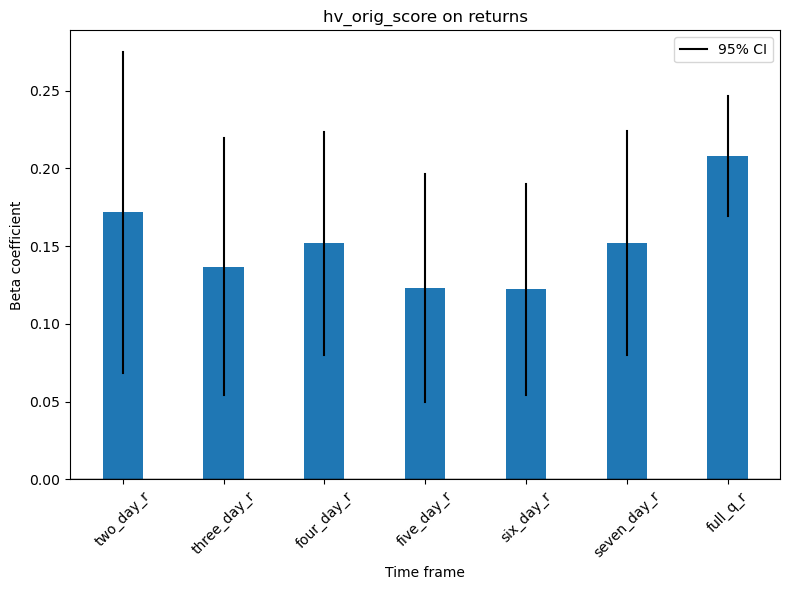

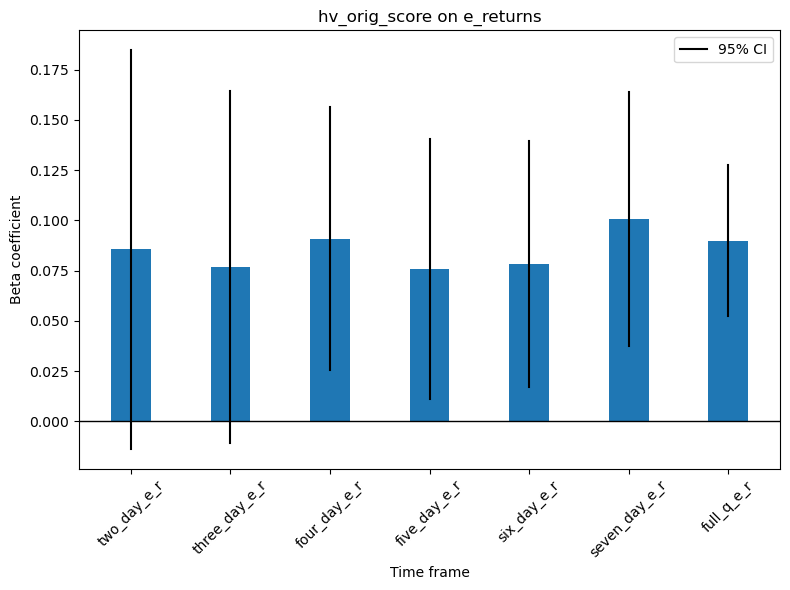

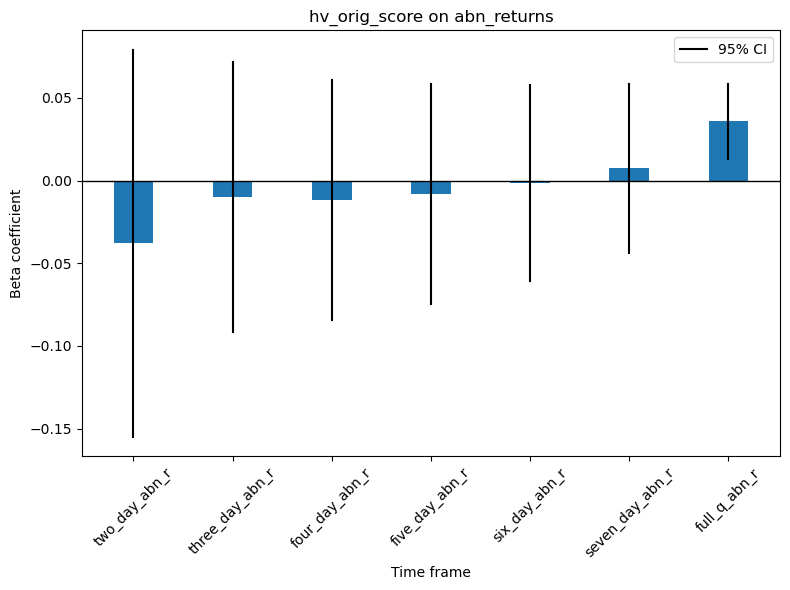

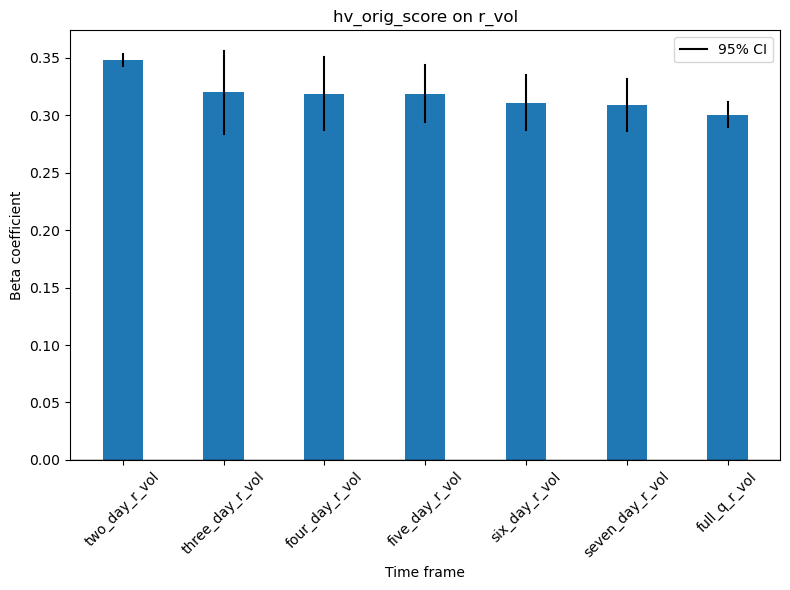

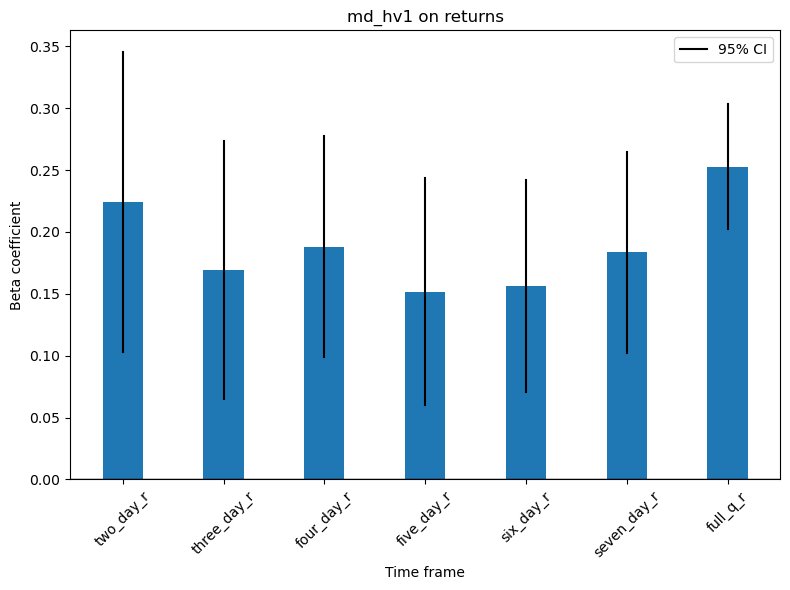

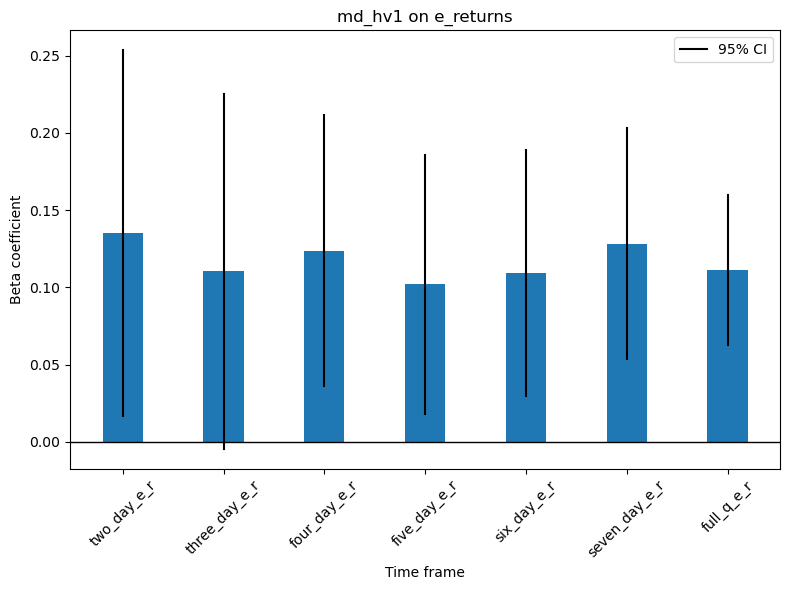

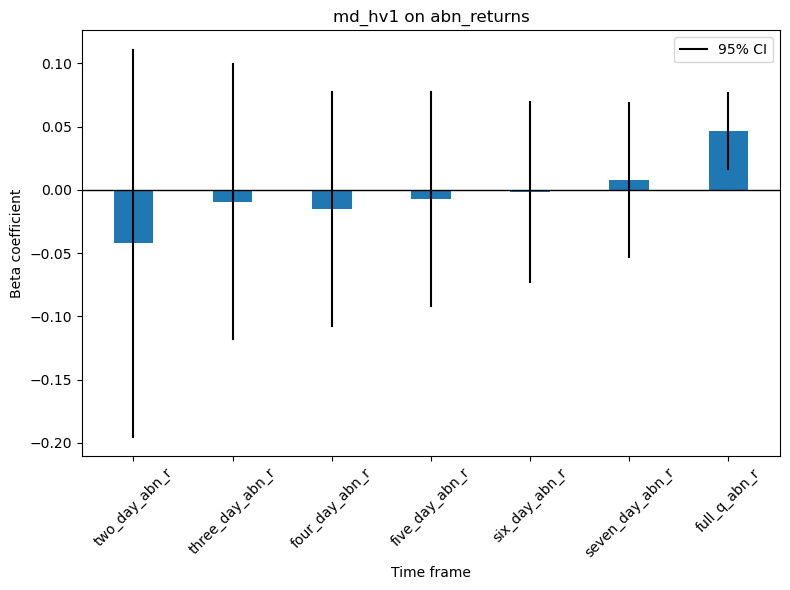

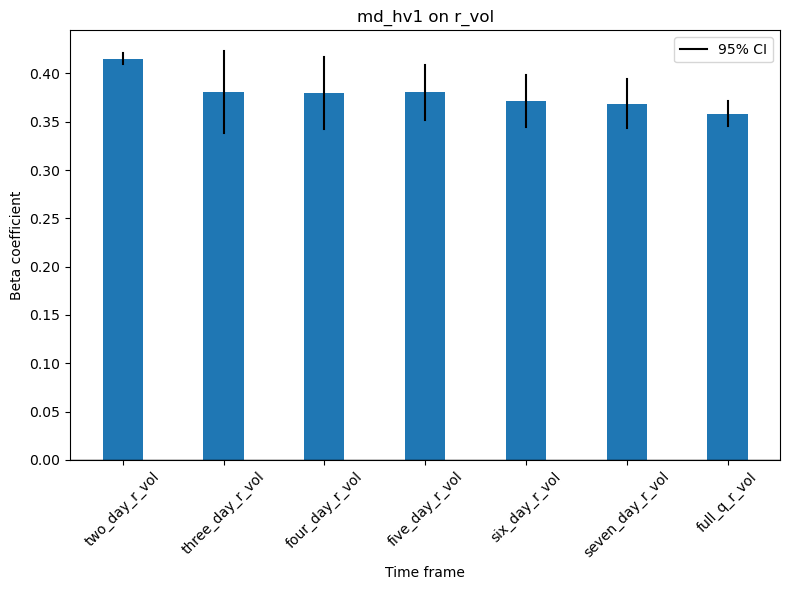

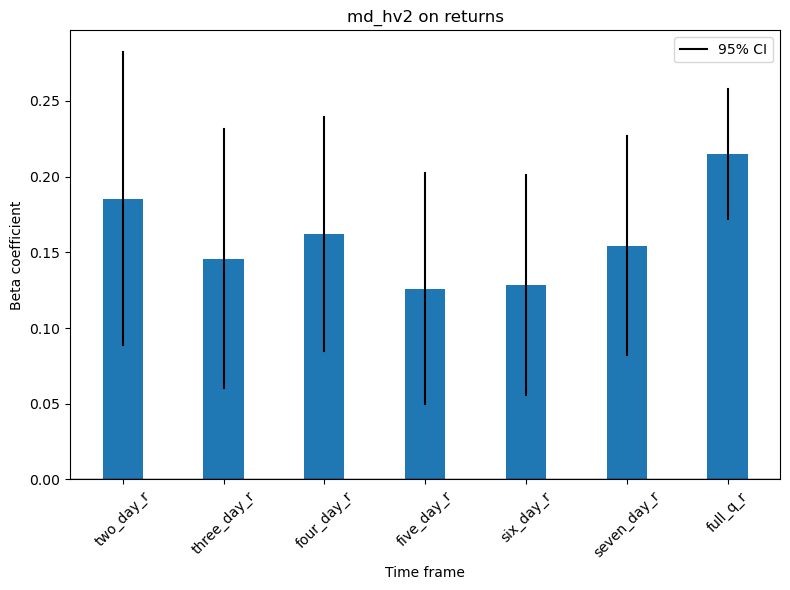

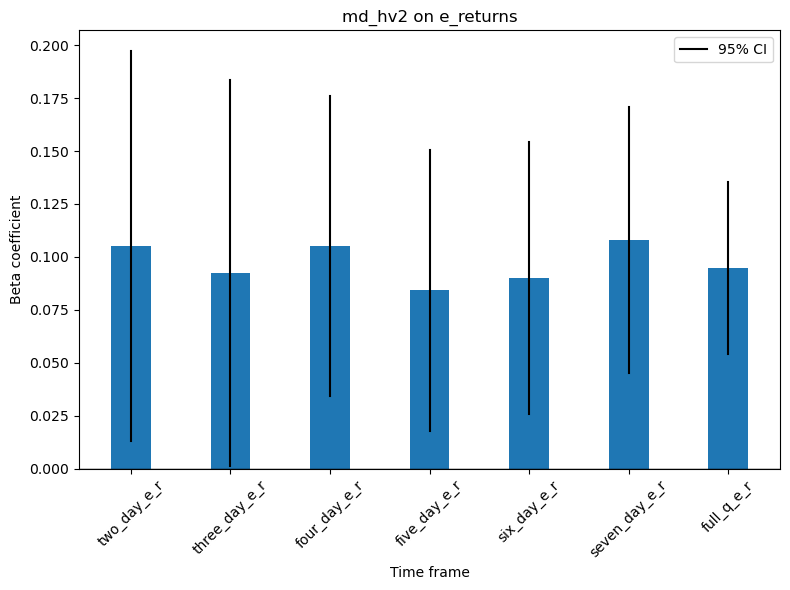

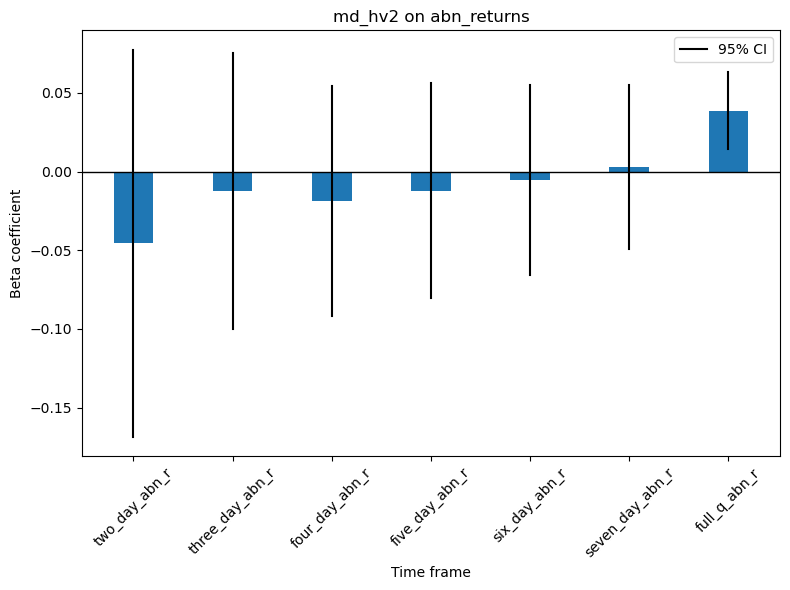

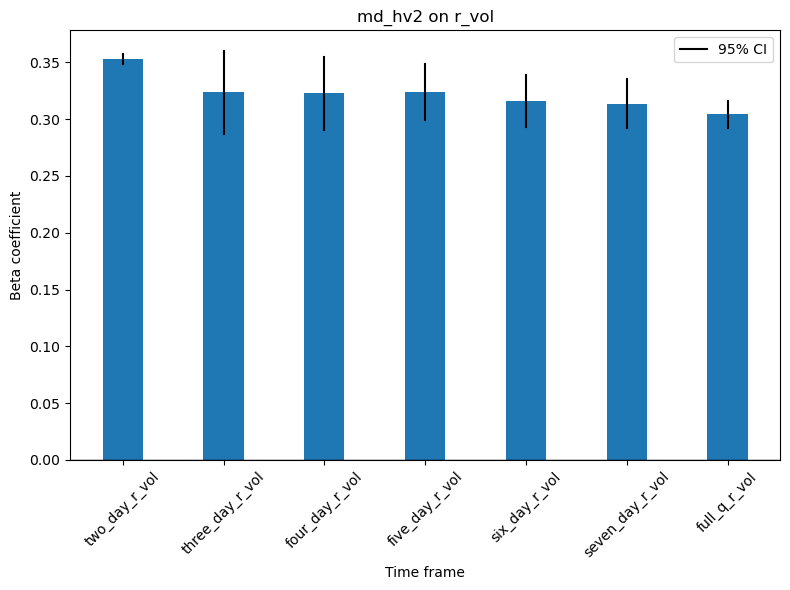

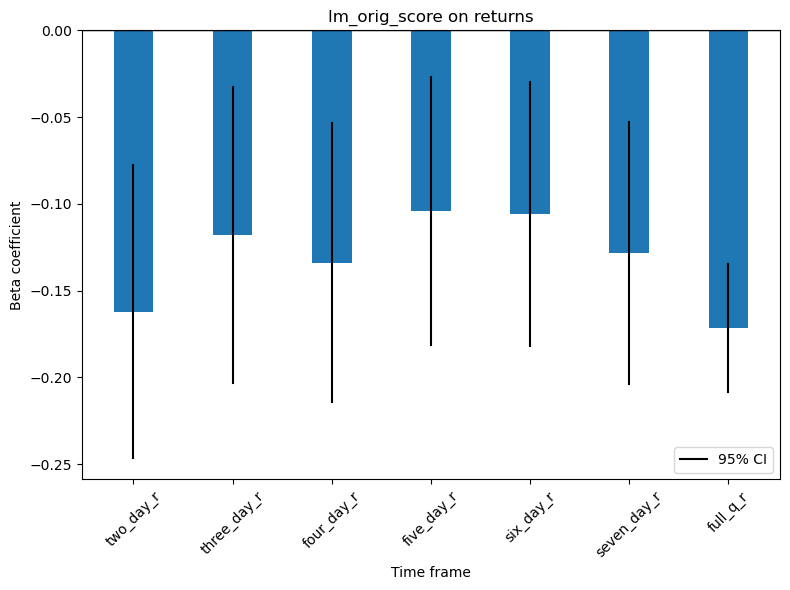

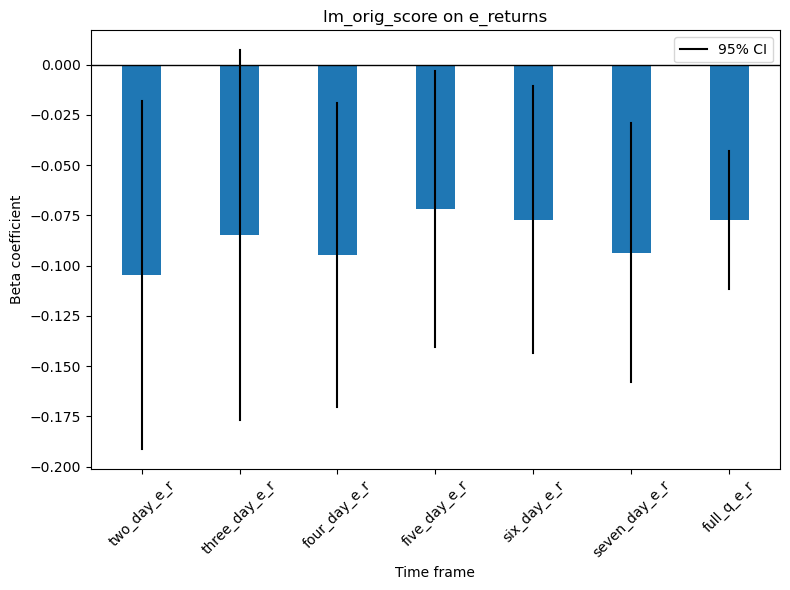

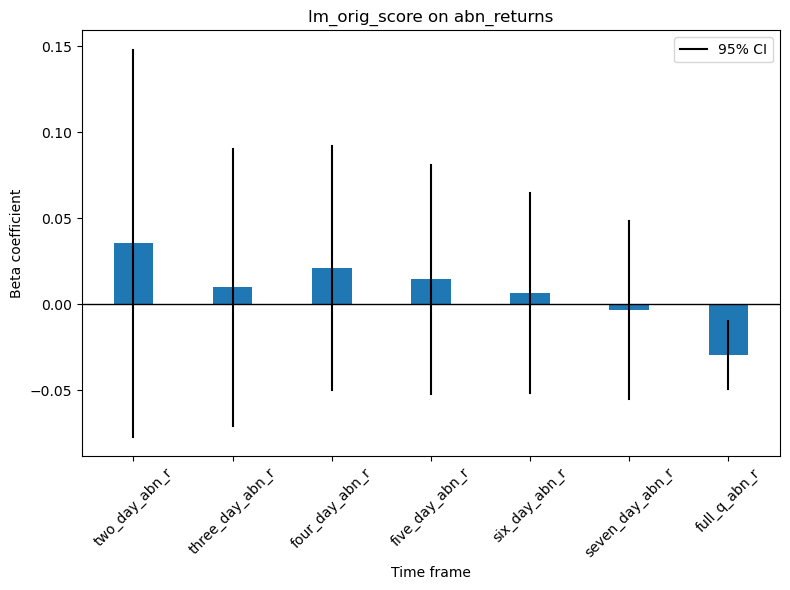

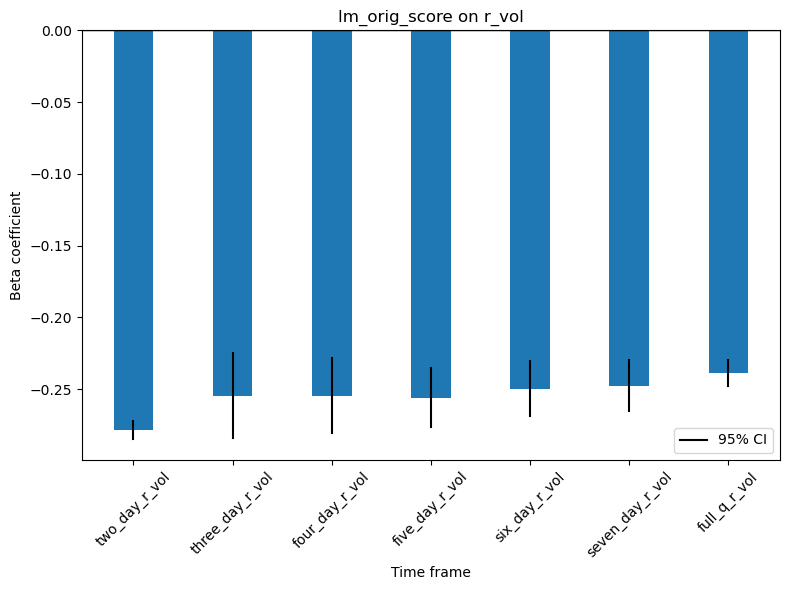

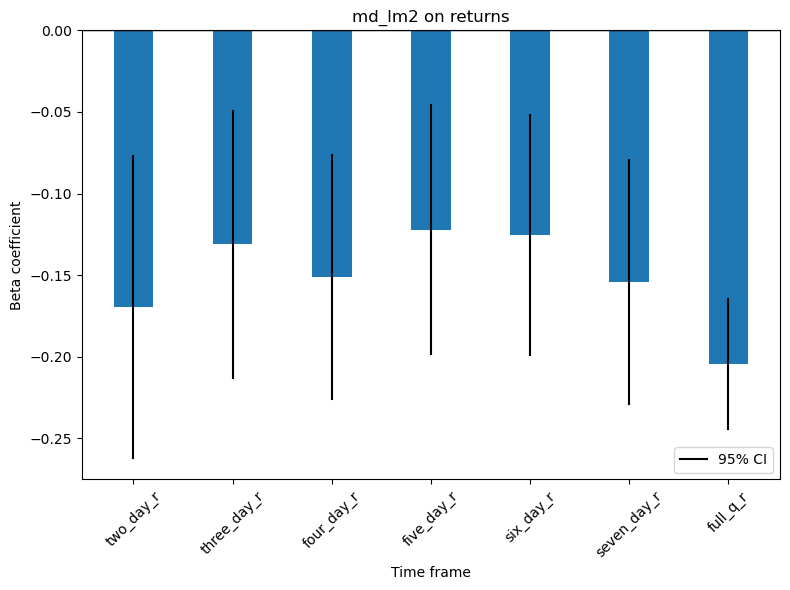

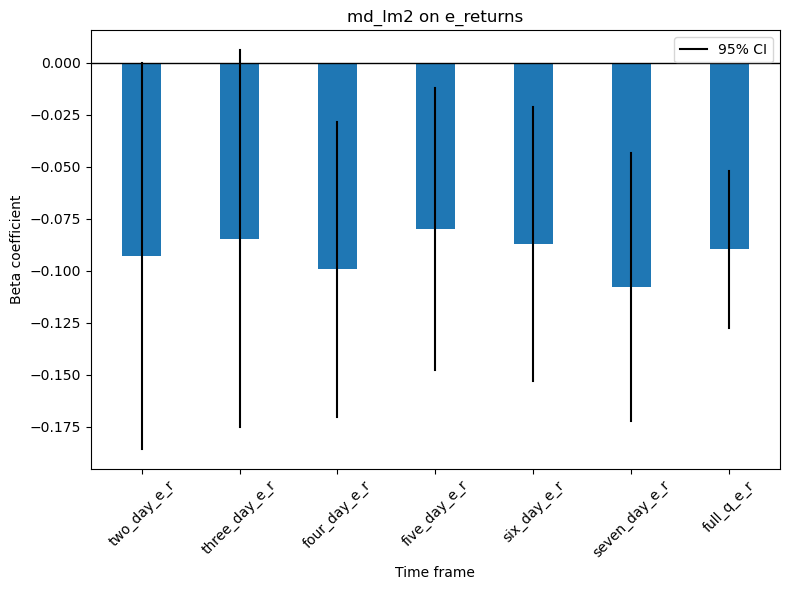

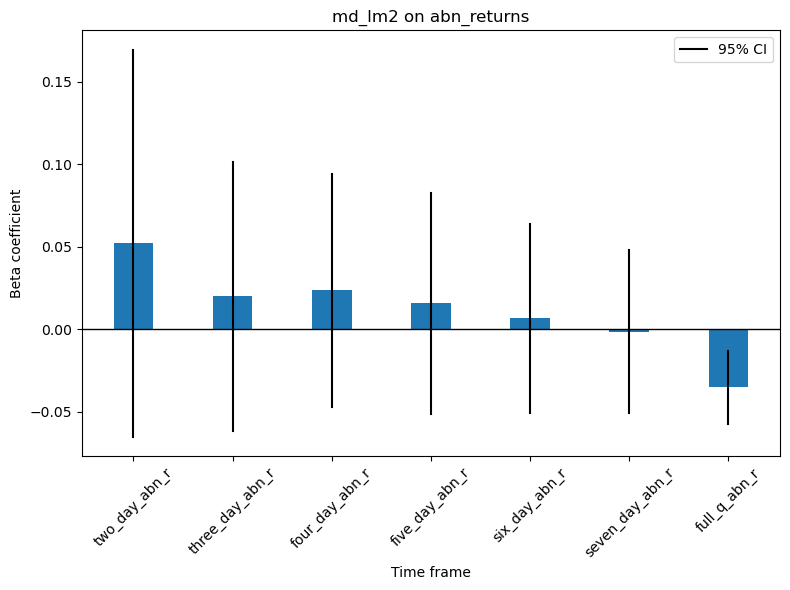

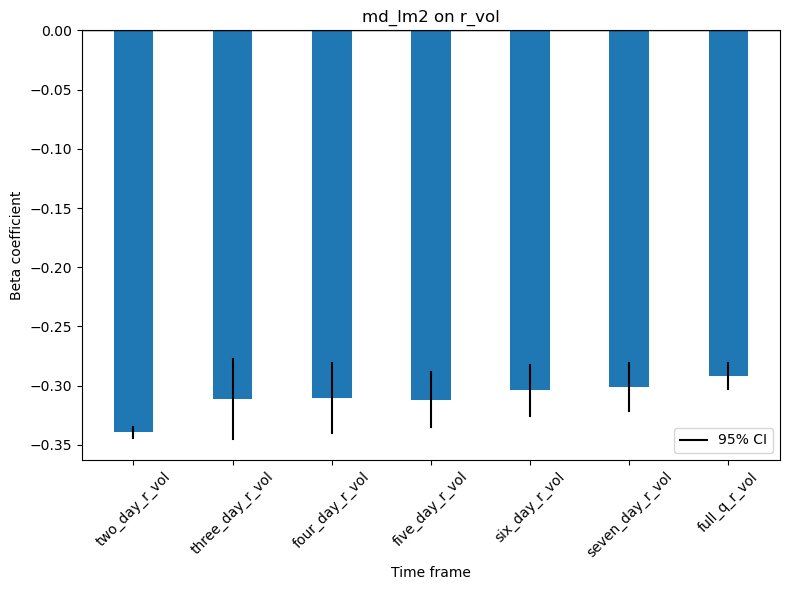

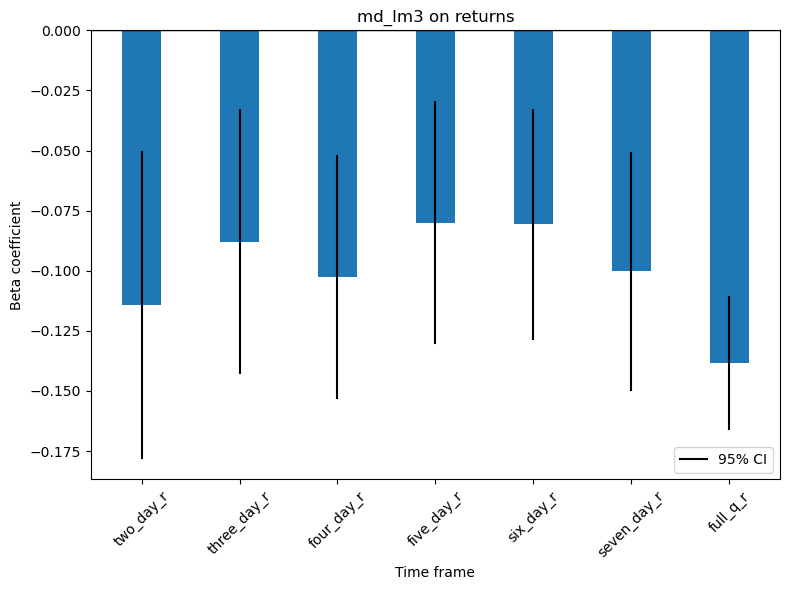

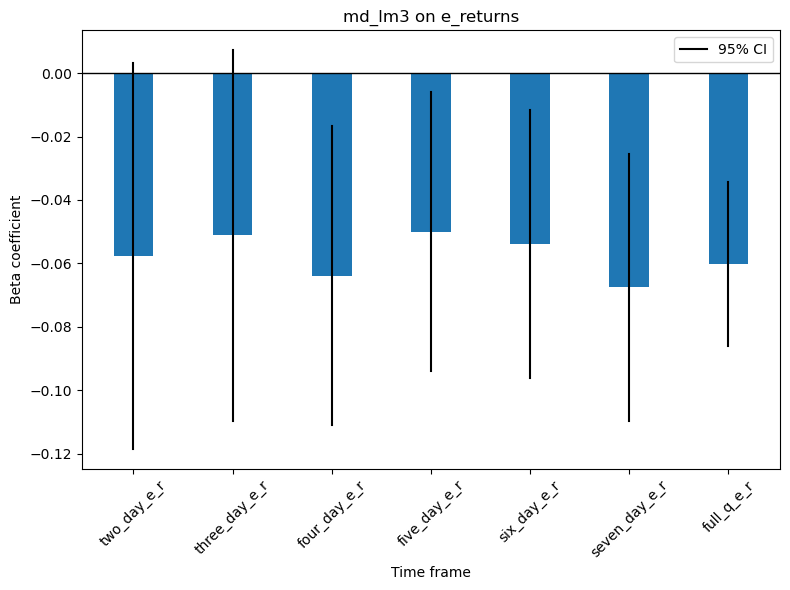

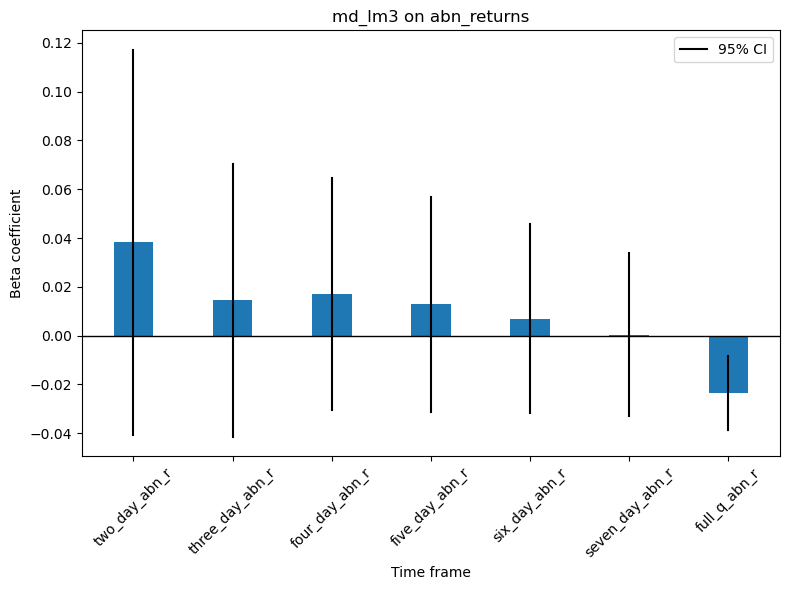

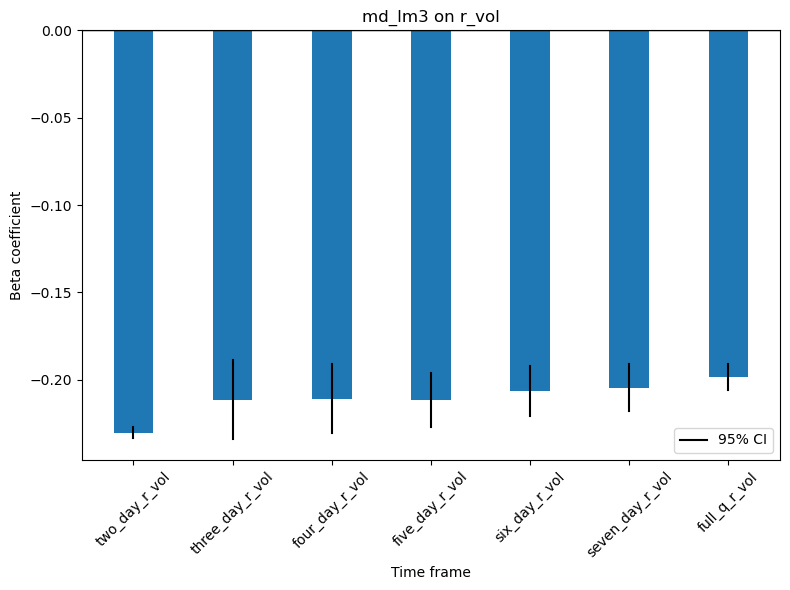

In [94]:
model.plot_all_params()